<a href="https://colab.research.google.com/github/cdiegor/Metaheuristicas/blob/main/Metaheur%C3%ADsticas_Estado_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

Este é um conjunto de notas de aula para um curso de  graduação sobre metaheurísticas e otimização combinatória. 

A primeira versão das notas foi escrita em 2023 quando ministrei este curso pela primeira vez. Procuramos trazer descrições de algoritmos e explicações intuitivas sobre os assuntos nesta área. Estas notas servem como um complemento a um livro didático e os exercícios como um guia de aplicação de metaheurísticas.

### O que é uma metaheurística?

Metaheurística é um termo um tanto infeliz frequentemente usado para descrever um subcampo importante, na verdade o subcampo primário, de otimização estocástica. A otimização estocástica é a classe geral de algoritmos e técnicas que empregam algum grau de aleatoriedade para encontrar ótimo (ou tão ótimo quanto possível) soluções para problemas difíceis. As metaheurísticas são as mais gerais desses tipos de algoritmos, e são aplicados a uma ampla gama de problemas.

Que tipos de problemas? Em Jacobellis v. Ohio (1964, sobre obscenidade), os Estados Unidos
O juiz da Suprema Corte, Potter Stewart, escreveu uma frase famosa:

*Não tentarei hoje mais definir os tipos de material que entendo serem adotados dentro dessa descrição abreviada; e talvez eu nunca conseguisse fazê-lo de forma inteligível. Mas eu reconheço quando vejo, e o filme envolvido neste caso não é esse.*

As metaheurísticas são aplicadas a problemas do tipo *sei quando vejo*. São algoritmos usados para encontrar respostas para problemas quando você tem muito pouco para ajudá-lo: você não sabe de antemão o que solução ótima parece, você não sabe como encontrá-la de uma maneira baseada em princípios, você
têm muito pouca informação heurística para continuar, e a busca de força bruta está fora de questão porque
o espaço é muito grande. Mas se você receber uma solução candidata para o seu problema, poderá testá-la e avaliar o quão boa é. Ou seja, você reconhece uma boa solução quando a vê.

Por exemplo: imagine se você está tentando encontrar um conjunto ideal de comportamentos de robôs para uma partida de futebol. Você tem um simulador para o robô e pode testar qualquer conjunto de comportamentos do robô e atribuir-lhe uma qualidade (você reconhece uma boa qualidade quando a vê). E você achou uma definição para saber como os conjuntos de comportamento do robô se parecem em geral. Mas você não tem ideia de qual é o comportamento ideal, nem mesmo como proceder para encontrá-lo.

A coisa mais simples que você pode fazer nessa situação é a **busca aleatória**: apenas tente o comportamento aleatório enquanto você tiver tempo e guarde o melhor que você descobriu. Mas antes de desistir e começar a fazer busca aleatória, considere a seguinte alternativa, conhecida como **subida da colina**. Começar com um comportamento aleatório. Em seguida, faça uma pequena modificação aleatória e experimente a nova versão. Se a nova versão é melhor, jogue a antiga fora. Caso contrário, jogue a nova versão fora. Agora faça outra modificação pequena e aleatória em sua versão atual (qualquer uma que você não jogou fora). Se esta versão mais recente for melhor, jogue fora sua versão atual, caso contrário, jogue fora a versão mais recente. Repita o máximo que puder.

**Subida da colina** é um algoritmo metaheurístico simples. Ele explora uma crença heurística sobre o seu espaço de soluções candidatas, o que geralmente é verdade para muitos problemas: que soluções semelhantes tendem a se comportar de maneira semelhante (e tendem a ter qualidade semelhante), então pequenas modificações geralmente resultarão
em pequenas e bem comportadas mudanças de qualidade, permitindo-nos “subir o morro” da qualidade até boas
soluções. Essa crença heurística é uma das características definidoras centrais das metaheurísticas: de fato, quase todas as metaheurísticas são essencialmente combinações elaboradas de escalada e busca aleatória.

Os problemas “eu reconheço quando vejo” enfrentados por metaheurísticas são uma subclasse de **problemas inversos**. Um problema inverso é aquele em que você tem uma função de teste $f$ que leva uma solução candidata e produz uma avaliação da mesma, mas em que é difícil ou impossível construir a função inversa $f^{-1}$ que faz uma avaliação e retorna uma solução candidata que tenha essa avaliação. Em nosso exemplo, nosso simulador de robô e procedimento de teste é $f$. Mas o que realmente queremos é uma função inversa $f^{-1}$ que faz uma avaliação e retorna um comportamento de robô. Dessa forma, se tivéssemos sorte, poderíamos inserir o valor de avaliação ideal em $f^{-1}$ e obter o comportamento ideal do robô.

Os métodos de otimização (como a meteurística) são projetados para superar problemas inversos. Mas
muitas técnicas clássicas de otimização, como **subida do gradiente** fazem fortes suposições
sobre a natureza de f : por exemplo, que também conhecemos sua primeira derivada $f'$. Metaheurísticas
fazem suposições muito mais fracas e, às vezes, não fazem nenhuma. Isso significa que as metaheurísticas são muito gerais, mas também significa que geralmente são considerados métodos de última hora, usados quando
nenhuma outra técnica conhecida funciona. Acontece que é o caso de uma enorme, importante e crescente coleção de problemas.

### Notação

## Otimização clássica

### Subida do gradiente

In [ ]:
#TO DO Subida do gradiente

### Método de Newton

In [ ]:
#TO DO Método de Newton

### Subida do gradiente com reinicialização

## Metaheurísticas de trajetória

A otimização baseada em gradiente faz uma grande suposição: que você pode calcular a primeira (ou mesmo a segunda) derivada. Essa é uma grande suposição. Se você está otimizando uma função matemática bem formada, bem estudada, é razoável. Mas na maioria dos casos, você não pode calcular o gradiente do função porque você nem sabe qual é a função. Tudo o que você tem é uma maneira de criar ou modificar entradas para a função, testando-as e avaliando sua qualidade.

Por exemplo, imagine que você tenha um simulador de robô humanóide e esteja tentando encontrar um loop ideal de operações cronometradas para manter o robô avançando sem cair. Você tem algumas $n$ operações diferentes, e suas soluções candidatas são strings de tamanho arbitrário dessas operações. Você pode conectar uma string no simulador e obter uma qualidade (até onde o robô se moveu para a frente antes de cair). Como encontrar uma boa solução?

Tudo o que você recebe é uma caixa preta (neste caso, o simulador de robô) descrevendo um problema que você gostaria de otimizar. A caixa tem um dispositivo onde você pode enviar uma solução candidata para o problema (aqui, uma sequência de operações cronometradas do robô). Então você pressiona o grande botão vermelho e sai a qualidade avaliada dessa solução candidata. Você não tem ideia de que tipo de superfície a qualidade função de avaliação parece quando plotada. Sua solução candidata nem precisa ser uma vetor de números: pode ser uma estrutura de grafo, ou uma árvore, ou um conjunto de regras, ou uma string de operações do robô! O que for apropriado para o problema.

Para otimizar uma solução candidata neste cenário você precisa ser capaz de fazer três coisas:

1.   Dar uma ou mais soluções candidatas iniciais. Este é chamado de **procedimento de inicialização**.
2.   Atestar a qualidade de uma solução candidata. Este é chamado de **procedimento de avaliação**.
3.   Copiar e modificar uma solução candidata, produzindo uma nova solução, ligeiramente e aleatoriamente diferente. Este é chamado de **procedimento de modificação**. 

Para isso, o algoritmo normalmente fornecerá um **procedimento de seleção** que decide quais soluções candidatas a reter e quais a rejeitar enquanto vagueia pelo espaço de soluções possíveis para o problema.



### Subida da colina

Vamos começar com uma técnica simples, **subida na colina** (*Hill-Climbing*). Esta técnica está relacionada com a subida do gradiente, mas não requer que você conheça a força do gradiente ou mesmo sua direção: você apenas testa iterativamente novas soluções candidatas na região de sua candidata atual e adota novas soluções se forem melhores. Isso permite que você suba a colina até atingir um **ótimo local**.

In [ ]:
#TO DO: Hill-Climbing

Observe a forte semelhança entre a **subida da colina** e a **subida do gradiente**. A única real diferença é que a operação ```modificar``` é mais geral e deve contar com uma abordagem estocástica (parcialmente aleatória) para procurar soluções candidatas melhores. Às vezes encontra piores por perto, às vezes encontra melhores.

Podemos tornar esse algoritmo um pouco mais agressivo: criar uma série de “ajustes”, também conhecida como **vizinhança** para uma solução candidata todas de uma vez e, possivelmente, adotar a melhor. Este algoritmo modificado é chamado **subida da colina de máxima inclinação** (*Steepest
Ascent Hill-Climbing*), porque ao amostrar uma vizinhança em torno de uma solução candidata original e, em seguida, escolher a melhor, estamos essencialmente *amostrando* o gradiente e marchando direto para cima.

In [ ]:
#TO DO: Steepest Ascent Hill-Climbing

### Representando soluções

A inicialização, a cópia, o ajuste e (em menor grau) as funções de avaliação de qualidade coletivamente
definem a representação de sua solução candidata. Juntos, eles estipulam do que sua solução candidata  é composta e como ela opera.


Como pode ser uma solução candidata? Pode ser um vetor; ou uma lista de tamanho arbitrário; ou um conjunto ou coleção desordenada de objetos; ou uma árvore; ou um grafo. Ou qualquer combinação desses objetos matemáticos. O que parecer apropriado para o seu problema. Se você pode criar as quatro funções acima de uma forma razoável, você está no caminho certo.


Uma representação simples e comum para soluções candidatas, à qual vamos nos ater por enquanto, é a mesma usada nos métodos de gradiente: um vetor de comprimento fixo de números de valor real. Criar um vetor aleatório é fácil: basta escolher números aleatórios dentro dos limites escolhidos. Se os limites são min e max inclusive, e o comprimento do vetor é l, poderíamos fazer isso:



In [ ]:
# TO DO Gerar um vetor de valores reais

Para ajustar um vetor, podemos (como uma das muitas possibilidades) adicionar uma pequena quantidade de ruído para cada número: de acordo com nossa definição atual de ```modificar```, vamos assumir por agora que
este ruído não é maior do que um valor pequeno. Aqui está uma maneira simples de adicionar um ruído aleatório limitado, uniformemente distribuído a um vetor. Para cada posição no vetor, com alguma probabilidade $p$, geramos um ruído aleatório uniforme limitado para adicionar ao número naquela posição. Na maioria casos mantemos p = 1.

In [ ]:
#TO DO Convolução uniforme limitada

Agora temos um botão que podemos girar: $r$, o tamanho do limite na modificação. Se o tamanho for muito pequeno, então a **subina da colina** irá marchar até uma colina local e será incapaz de pular para a próxima colina porque o limite é muito pequeno para saltar tão longe. Uma vez que está no topo de uma colina, em todos os lugares o salto será pior do que onde está atualmente, então ele permanece parado. Além disso, a taxa na qual ele sobe a colina será delimitada por seu pequeno tamanho. Por outro lado, se o tamanho for grande, então a **subida da colina**
vai rolar muito. É importante ressaltar que quando estiver próximo ao topo de um morro, terá dificuldade de convergir para o pico, pois a maioria de seus movimentos será tão grande que ultrapassará o pico.

Assim, tamanhos pequenos do limite se movem lentamente e são capturados em ótimos locais; e com tamanhos grandes o algoritmo salta muito freneticamente e não pode convergir rapidamente para atingir o topo dos picos. Observe como isso é semelhante ao usado na **subida do gradiente**. Este botão é uma forma de controlar o grau de **Intensificação** *versus* **Diversificação** na nossa **subida**. Algoritmos de otimização que
fazem melhorias em grande parte locais estão *intensificando* o gradiente local, e os algoritmos que principalmente vagueiam aleatoriamente são pensados para *diversificar* o espaço. Como regra geral: você gostaria de usar um algoritmo altamente *intenso* (é mais rápido), mas quanto mais “feio” o espaço, mais você não terá escolha senão usar um algoritmo mais *diverso*.

### Busca aleatória

Um **algoritmo de otimização global** é aquele que, se o executarmos por tempo suficiente, acabará por encontrar o ótimo global. Quase sempre, a forma como isso é feito é garantindo que, no limite, cada
local no espaço de busca será visitado. Os algoritmos de estado único que vimos até agora não podem
garantir isso. Isso se deve à nossa definição (no momento) de ```modificar```: “fazer uma mudança pequena, limitada, mas aleatória”. ```modificar``` nunca faria grandes mudanças. Se estamos presos em um
ótimo local suficientemente amplo, ```modificar``` pode não ser forte o suficiente para nos tirar dele. Assim, os algoritmos até agora têm sido algoritmos de otimização local.

Existem muitas maneiras de construir um algoritmo de otimização global. Vamos começar com o mais simples possível: **Busca Aleatória**.

In [ ]:
#TO DO Busca Aleatória

### Combinando intensificação e diversificação

Random Search é o extremo em **diversificação** (e *otimização global*); em contraste a **subida da colina** com ```modificar``` definido para fazer apenas mudanças muito pequenas e nunca grandes,
pode ser visto como o extremo em **intensificação** (e *otimização local*). Mas há maneiras de conseguir
intensificação razoável e ainda ter um algoritmo global. Considere a seguinte técnica popular,
chamado **Subida da Colina com Reinício Aleatório**, a meio caminho entre os dois. Fazemos montanhismo para
uma certa quantidade aleatória de tempo. Então, quando o tempo acabar, recomeçamos com um novo local aleatório e fazemos a **subida da colina** novamente por um período de tempo aleatório diferente.

In [ ]:
#TO DO Subida da Colina com Reinício Aleatório

Se os intervalos de tempo escolhidos aleatoriamente são geralmente extremamente longos, esse algoritmo é basicamente um grande montanhista. Da mesma forma, se os intervalos forem muito curtos, estamos basicamente fazendo uma pesquisa aleatória (redefinindo para novos locais aleatórios a cada vez). Comprimentos de intervalo moderados variam entre os dois. Isso é bom, certo?

Depende. Considere a figura abaixo. A primeira figura, denominada *Unimodal*, é uma situação em que a **subida da colina** está próxima do ideal e onde a pesquisa aleatória é uma escolha muito ruim. Mas para a figura rotulada como *Noisy*, a **subida da colina** é muito ruim; e, de fato, espera-se que a Pesquisa aleatória seja tão boa quanto você pode fazer (sem saber nada sobre as funções de antemão). A diferença é que no *Unimodal* existe uma forte relação entre a distância (ao longo do eixo x) de duas
soluções candidatas e sua relação em qualidade: soluções semelhantes são geralmente semelhantes em
qualidade e soluções diferentes não têm nenhuma relação entre si. Na situação *Noisy*, não há nenhuma relação como esta: mesmo soluções semelhantes são muito diferentes em qualidade. Isso é frequentemente conhecido como critério de suavidade para que a busca local seja efetiva.



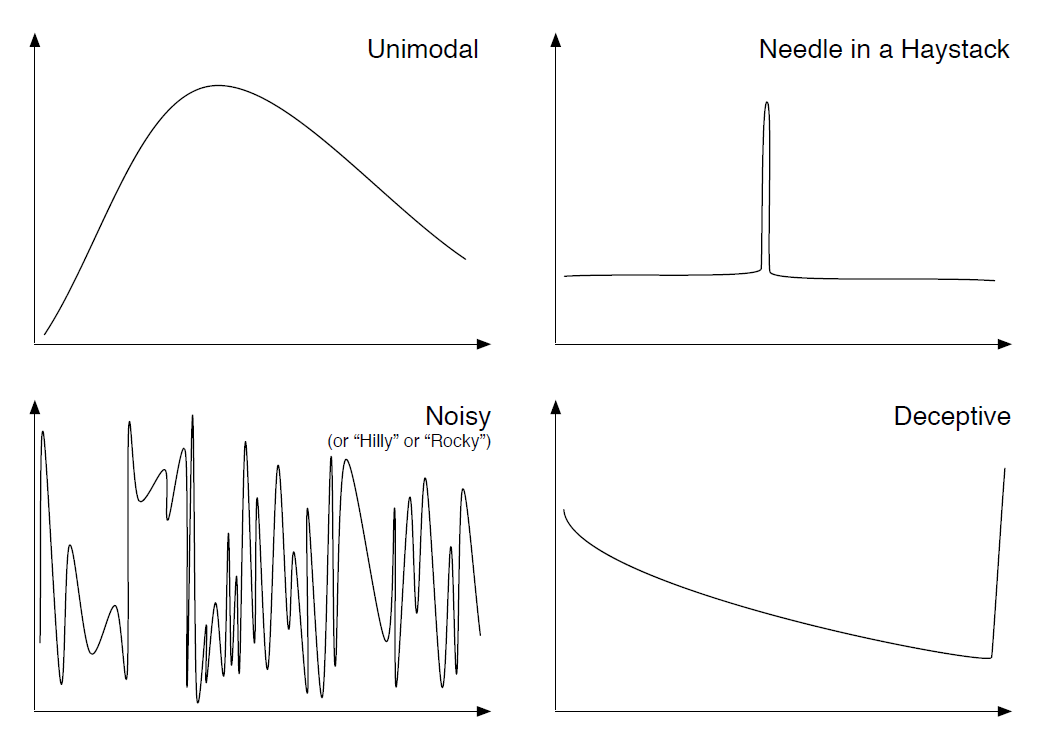

Isso não é suficiente. Considere a figura intitulada *Needle in a Haystack*, para a qual a **busca aleatória** é o único caminho real a percorrer, e a **subida da colina** é bastante ruim. Qual é a diferença entre isso e *Unimodal*? Afinal, *Needle in a Haystack* é bastante suave. Para que a pesquisa local seja eficaz deve haver um gradiente informativo que geralmente conduza às melhores soluções. Na verdade, você pode fazer gradientes altamente não informativos para os quais a **subida da colina** é espetacularmente ruim! Na figura rotulada *Deceptive*, a **subida da colina** não só não encontrará facilmente o ótimo, mas irá ativamente
se distanciar do ideal.

Portanto, existem alguns tipos de problemas em que fazer pequenas mudanças locais gananciosas funciona melhor; e outros problemas em que fazer alterações grandes e quase aleatórias é melhor. Algoritmos de pesquisa global têm o desafio de equilibrar esta batalha: **Intensificação** versus **Diversificação**. 

### Recozimento simulado

**Recozimento simulado** foi desenvolvido por vários pesquisadores em meados da década de 1980, mas tem uma famosa linhagem, sendo derivada do **Algoritmo Metropolis**, desenvolvido pelos ex-cientistas do Manhattan Project, Nicholas Metropolis, Arianna e Marshall Rosenbluth, e Augusta e Edward Teller
em 1953. O algoritmo varia da **subida da colina** em sua decisão de quando substituir $S$, a solução candidata original, com $R$, sua filha recém-ajustada. Especificamente: se $R$ é melhor que
$S$, sempre substituiremos $S$ por $R$ como de costume. Mas se $R$ for pior que $S$, ainda podemos substituir $S$ por $R$
com uma certa probabilidade $P(t, R, S)$:

> $P(t, R, S) = e^\frac{Q(R) - Q(S)}{t}$

onde $t \geq 0$ é uma grandeza própria do algoritmo chamada temperatura. Ou seja, o algoritmo às vezes desce morros. Esta equação é interessante em dois
sentidos. Observe que a fração é negativa porque $R$ é pior que $S$. Primeiro, se $R$ for muito pior que $S$, a fração é maior e, portanto, a probabilidade é próxima de $0$. Se $R$ estiver muito próxima de $S$, a probabilidade é perto de 1. Portanto, se $R$ não for muito pior que $S$, ainda selecionaremos $R$ com uma probabilidade razoável.

Em segundo lugar, temos um parâmetro ajustável $t$. Se $t$ estiver próximo de $0$, a fração é novamente um número grande, e assim a probabilidade é próxima de $0$. Se $t$ for alto, a probabilidade é próxima de $1$. A ideia é definir inicialmente $t$ para um número alto, o que faz com que o algoritmo se mova para cada solução recém-criada independentemente
de sua qualidade. Estamos fazendo uma espécie de  **caminhada aleatória** no espaço. Então $t$ diminui lentamente, eventualmente para $0$, ponto em que o algoritmo não está fazendo nada além de uma simples **subida na colina**.

In [ ]:
#TO DO Recozimento Simulado

Recozimento Simulado recebe o nome do processo de  recozimento que é o resfriamento de metal fundido. Se o metal esfria rapidamente, seus átomos não têm chance de se acomodar em uma rede compacta e são congelados em uma configuração aleatória, resultando em metal frágil. Se diminuirmos a temperatura muito lentamente, os átomos têm tempo suficiente para se estabelecerem em um cristal forte. Daí o significado da temperatura para o parâmetro $t$.

### Busca Tabu

A **Busca Tabu**, de Fred Glover, emprega uma abordagem diferente para fazer a diversificação: ela  mantém um histórico de soluções candidatas recentemente consideradas (conhecidas como lista tabu) e se recusa a retornar a essas soluções candidatas até que estejam suficientemente longe no passado. Assim, se subirmos uma colina,
não temos escolha a não ser vagar de volta para o outro lado porque não temos permissão para ficar ou
voltar ao topo da colina.

A abordagem mais simples para a Busca Tabu é manter uma lista tabu $L$, de comprimento máximo $l$,
de soluções candidatas que vimos até agora. Sempre que adotamos uma nova solução candidata, ela vai
na lista tabu. Se a lista tabu for muito grande, removemos a solução candidata mais antiga e ela deixa de ser tabu para reconsiderar. A pesquisa tabu geralmente é implementada como uma variação da **máxima inclinação**. Na versão abaixo, geramos uma vizinhança de soluções descendentes ajustadas, mas consideramos apenas aquelas que não são tabu atualmente.


In [ ]:
#TO DO Busca Tabu

A **busca tabu** realmente funciona apenas em espaços discretos. E se o seu espaço de pesquisa for de números reais? Somente em situações verdadeiramente excepcionais você visitará o mesmo ponto de valor real no espaço duas vezes, tornando a lista tabu inútil. Nesta situação, uma abordagem é considerar uma solução para ser membro de uma lista se for “suficientemente semelhante” a um membro existente da lista. A medida de semelhança ou distância dependerá do desenvolvedor do algoritmo.

Mesmo assim, o grande problema da **busca tabu** é que se o seu espaço de busca for muito grande, e
principalmente se for de alta dimensionalidade, é fácil ficar na mesma vizinhança, de fato na mesma colina, mesmo que você tenha uma lista tabu muito grande. Pode haver muitos locais. Uma abordagem alternativa é criar uma lista tabu não de soluções candidatas que você considerou antes, mas das alterações feitas recentemente em determinados recursos. Por exemplo, imagine se você está encontrando uma solução a um problema de grafo como o Problema do Caixeiro Viajante. Você ajusta uma solução candidata para criar uma nova, excluindo a aresta A e adicionando arestas B e C, e decide adotar
a nova solução. Em vez de colocar a solução na lista tabu, você coloca as alterações feitas na lista. A, B e C vão para a lista. Agora, por um tempo, enquanto você está pensando em novos ajustes, você não tem permissão para sequer considerar adicionar ou excluir A, B ou C. Eles são um tabu por enquanto.



In [ ]:
#TO DO Busca Tabu com proibição de características



Talvez para implementar isso, a grande mudança que precisaremos fazer é na natureza da fila que atua como nossa lista tabu. A fila não pode mais ser uma simples fila primeiro a entrar, primeiro a sair porque pode haver um número variável de coisas que entrarão na fila a qualquer momento. Em vez disso, vamos implementá-la como um conjunto de tuplas $(X, d)$ onde $X$ é um recurso que alteramos (por exemplo, uma aresta no grafo) e $d$ é o carimbo de data/hora de quando fizemos a troca. Além disso, não podemos mais simplesmente testar a associação na fila. Em vez disso, teremos que entregar a fila para a operação ```modificar```, para que ela saiba quais alterações não é permitido fazer. Por isso nossa versão revisada: Tweak(Copy(...), L). Eu chamo o novo algoritmo de Pesquisa Tabu baseada em recursos.

### Busca local iterada

Este é o nome atual de um conceito que existe, sob muitas formas, desde pelo menos o 1980s. É essencialmente uma versão mais inteligente da **subida da colina com reinício aleatório**. Assumindo que você dá tempo suficiente entre as reinicializações, sempre que você faz uma reinicialização aleatória, você sopra o alpinista para algum (possivelmente novo) ótimo local. Assim, podemos pensar em **subida da colina com reinício aleatório** fazendo uma espécie de busca aleatória através do espaço de ótimos locais. Encontramos um local aleatório ótimo, depois outro, depois outro e assim por diante, e eventualmente retornamos o melhor ótimo que já descoberto (idealmente, é um ótimo global!)

A **Busca Local Iterada** (em inglês *Iterated Local Search* ou ILS) tenta pesquisar neste espaço de ótimos locais de uma forma mais inteligente: tenta escalar estocasticamente no espaço de ótimos locais. Ou seja, a **ILS** encontra um ótimo local, então procura por um ótimo local “próximo” e possivelmente adota este novo ótimo local como referência em seu lugar , então encontra um novo ótimo local “próximo” e assim por diante. A heurística aqui é que muitas vezes você pode encontrar melhores ótimos locais perto daquele em que você está atualmente, e caminhando de ótimo local para ótimo local dessa maneira muitas vezes supera apenas a tentativa de novos locais totalmente aleatórios.

A **ILS** consegue isso com dois truques. Primeiro, a **ILS** não escolhe novos locais de reinicialização totalmente ao acaso. Em vez disso, ela mantém uma espécie de local ideal de “base inicial” e seleciona novos locais de reinicialização que estão um pouco, embora não excessivamente, nas proximidades do ótimo local da “base inicial”. Nós queremos reiniciar longe o suficiente de nossa base atual para terminar em um novo ótimo local, mas não tanto a ponto de escolher novos locais de reinicialização essencialmente ao acaso. Queremos estar fazendo uma *caminhada* em vez de uma *busca* aleatória. Em segundo lugar, quando a **ILS** descobre um novo ótimo local, ela decide se deve manter o ótimo local atual como “base” ou adotar o novo ótimo local como a “base”. Se nós sempre escolhermos o novo ótimo local, estamos fazendo uma caminhada aleatória (uma espécie de meta-diversificação). Se nós escolhermos o novo ótimo local apenas se for melhor do que o atual, estamos fazendo uma escalada (uma espécie de meta-intensificação). A **ILS** geralmente escolhe algo entre os dois, conforme discutido posteriormente.

Se você abstrair esses dois truques, a **ILS** é muito simples. A única complexidade está em determinar
quando um ótimo local é descoberto. Como isso costuma ser difícil, em vez disso, empregaremos a mesma abordagem aqui usada em reinicializações aleatórias: definir um cronômetro. Suba a colina por um tempo e depois quando o cronômetro desliga, é hora de reiniciar. Isso obviamente não garante que encontramos o ótimo local durante a escalada, mas se o cronômetro for longo o suficiente, é provável que estejamos nas proximidades. O algoritmo é muito direto: faça uma escalada por um tempo; então (quando o tempo acabar) determinar se deve adotar o possível ótimo local recém-descoberto ou manter a “base” (a função ```muda_base```); então, de nossa nova base, faça uma grande modificação (a função ```perturbar```, que é idealmente suficiente para provavelmente pular para uma nova colina.


In [ ]:
#TO DO Busca Local Iterada

Muito do pensamento por trás das escolhas das funções ```perturbar``` e ```muda_base``` é uma arte secreta, determinada em grande parte pela natureza do problema específico que está sendo enfrentado. Aqui estão algumas dicas.

O objetivo da função ```perturbar``` é fazer uma modificação muito grande, grande o suficiente para provavelmente escapar do ótimo local atual, mas não tão grande a ponto de ser essencialmente uma randomização. Lembre-se que nós gostaríamos de cair em uma colina próxima. O significado de “grande o suficiente” varia muito de problema para problema.

O objetivo da função ```muda_base``` é escolher de forma inteligente novos locais de partida. Assim como algoritmos de otimização global, em geral, estão entre os extremos da diversificação (**busca aleatória** e **caminhada aleatória**) e intensificação (**subida da colina**), a função  ```muda_base``` deve estar em algum lugar entre esses extremos ao escolher entre ótimos locais. Em um extremo, o algoritmo poderia sempre adotar o novo ótimo local, ou seja,

> ```nova_base(B, S):```
> > ```return S```

Isso resulta essencialmente em uma caminhada aleatória de um ótimo local para um ótimo local. No outro extremo, o algoritmo só poderia usar o novo ótimo local se fosse de qualidade igual ou superior à
o velho, ou seja,

> ```nova_base(B, S):```
> > ```if Q(S) > Q(B): return S```
> > ```else: return B```

Isso resulta, mais ou menos, numa espécie de subida da colina entre os ótimos locais. A maioria das heurísticas **ILS** tenta encontrar um meio-termo entre os dois. Por exemplo, o **ILS** pode subir uma colina, a menos que não tenha visto uma solução nova e melhor em um tempo, momento em que começa a fazer caminhadas aleatórias por um tempo. Existem outras opções, é claro: poderíamos aplicar uma abordagem de **recozimento simulado** para ```muda_base```, ou um tipo de procedimento de **busca tabu**.

### Busca em vizinhança variável

